<a href="https://colab.research.google.com/github/vijipandian/project/blob/main/Food_Delivery_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv(r"/content/Food_Delivery_Times.csv")
data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [4]:
data.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [ ]:
data['Courier_Experience_yrs'].value_counts()

In [6]:
data['Courier_Experience_yrs']=data['Courier_Experience_yrs'].fillna(data['Courier_Experience_yrs'].mode()[0])

In [7]:
data['Time_of_Day'].value_counts()

,count
Time_of_Day,
Morning,308
Evening,293
Afternoon,284
Night,85


In [8]:
data['Time_of_Day']=data['Time_of_Day'].fillna(data['Time_of_Day'].mode()[0])

In [9]:
data['Time_of_Day'].value_counts()

,count
Time_of_Day,
Morning,338
Evening,293
Afternoon,284
Night,85


In [10]:
data['Traffic_Level'].value_counts()

,count
Traffic_Level,
Medium,390
Low,383
High,197


In [11]:
data['Traffic_Level']=data['Traffic_Level'].fillna(data['Traffic_Level'].mode()[0])

In [12]:
data['Weather'].value_counts()

,count
Weather,
Clear,470
Rainy,204
Foggy,103
Snowy,97
Windy,96


In [13]:
data['Weather']=data['Weather'].fillna(data['Weather'].mode()[0])

In [14]:
data.isna().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


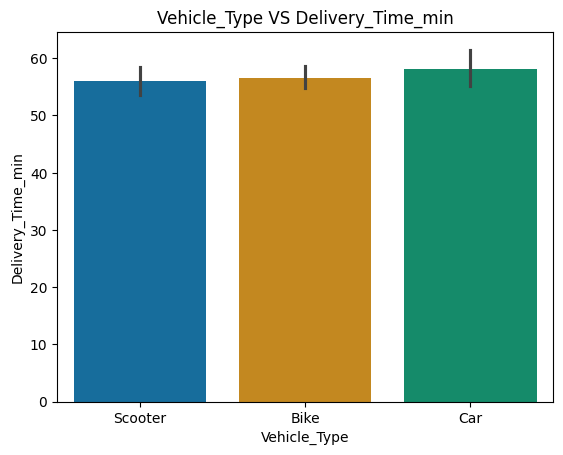

In [15]:
sns.barplot(x="Vehicle_Type",y="Delivery_Time_min",data=data,palette="colorblind",hue="Vehicle_Type")
plt.title("Vehicle_Type VS Delivery_Time_min")
plt.show()

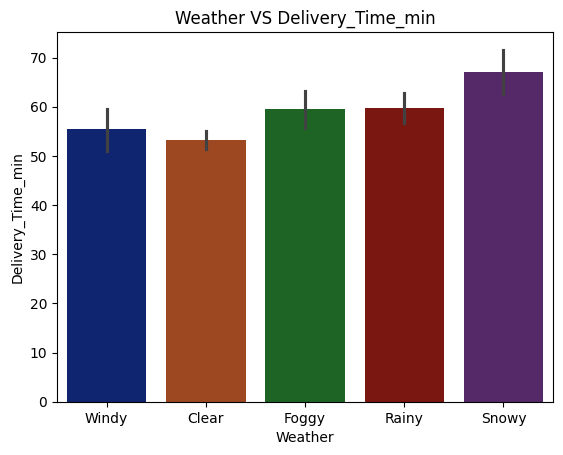

In [16]:
sns.barplot(x="Weather",y="Delivery_Time_min",data=data,palette="dark",hue="Weather")
plt.title("Weather VS Delivery_Time_min")
plt.show()

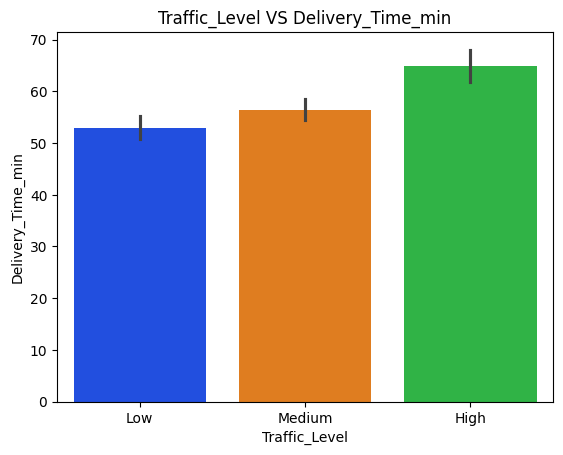

In [17]:
sns.barplot(x="Traffic_Level",y="Delivery_Time_min",data=data,palette="bright",hue="Traffic_Level")
plt.title("Traffic_Level VS Delivery_Time_min")
plt.show()

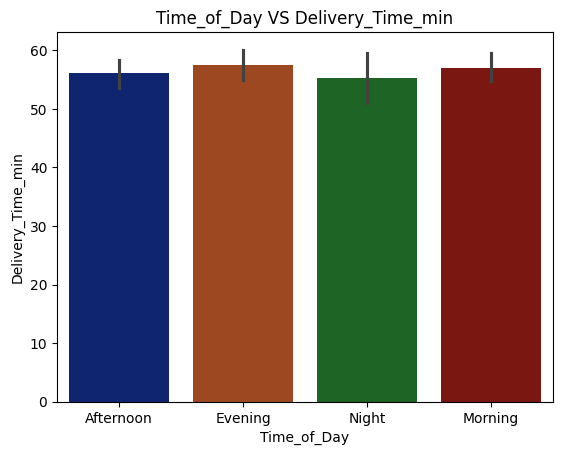

In [18]:
sns.barplot(x='Time_of_Day', y='Delivery_Time_min',data=data,palette="dark",hue="Time_of_Day")
plt.title("Time_of_Day VS Delivery_Time_min")
plt.show()

In [19]:
data.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.622000,56.732000
std,288.819436,5.696656,7.204553,2.880523,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


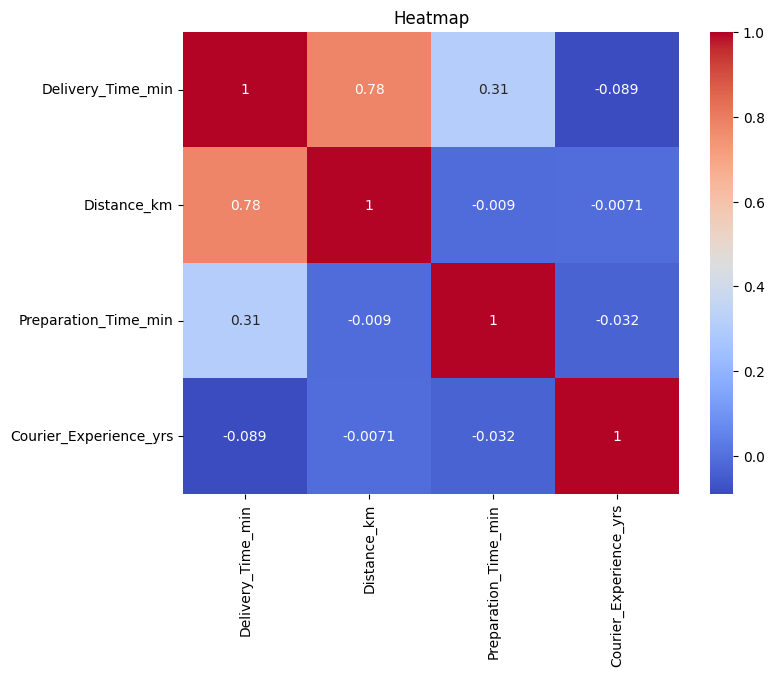

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(data[['Delivery_Time_min','Distance_km','Preparation_Time_min','Courier_Experience_yrs']].corr(),annot=True,cmap="coolwarm")
plt.title("Heatmap")
plt.show()

In [24]:
data=pd.get_dummies(data,columns=["Weather","Traffic_Level","Time_of_Day","Vehicle_Type"],drop_first=True)

In [ ]:
data.head(3)

In [27]:
x=data.drop(["Order_ID","Delivery_Time_min"],axis=1)
y=data["Delivery_Time_min"]

In [ ]:
print(x)
print(y)

**TRAIN & TEST SPLIT**

In [34]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 14)
(200, 14)
(800,)
(200,)


**LINEAR REGRESSION**

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [38]:
li=LinearRegression()
li.fit(x_train,y_train)

LinearRegression()

In [39]:
y_pre=li.predict(x_test)

In [ ]:
y_pre

In [42]:
print("LINEAR REGRESSION MAE:",mean_absolute_error(y_test,y_pre))
print("LINEAR REGRESSION MSE:",mean_squared_error(y_test,y_pre))

LINEAR REGRESSION MAE: 5.898472020368411
LINEAR REGRESSION MSE: 78.0573251973451


In [49]:
re_li=pd.DataFrame({"Actual":y_test,"predict":y_pre})
re_li

,Actual,predict
521,32,35.288676
737,68,66.524316
740,39,44.657428
660,44,43.900258
411,85,80.013488
...,...,...
408,78,80.082489
332,28,28.839002
208,60,57.828128
613,45,47.389834


**DECISION TREE TEGRESSOR**

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [45]:
y_pre_dtr=dtr.predict(x_test)

In [ ]:
y_pre_dtr

In [47]:
print("DECISIONTREEREGRESSOR:",mean_absolute_error(y_test,y_pre_dtr))
print("DECISIONTREEREGRESSOR:",mean_squared_error(y_test,y_pre_dtr))

DECISIONTREEREGRESSOR: 10.99
DECISIONTREEREGRESSOR: 248.31


In [48]:
res=pd.DataFrame({"Actual":y_test,"predict":y_pre_dtr})
res

,Actual,predict
521,32,34.0
737,68,71.0
740,39,28.0
660,44,51.0
411,85,78.0
...,...,...
408,78,94.0
332,28,32.0
208,60,59.0
613,45,50.0


**RANDOMFOREST REGRESSOR**

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [52]:
y_pre_rfr=rfr.predict(x_test)

In [ ]:
y_pre_rfr

In [54]:
print("RANDOMFORESTREGRESSOR:",mean_absolute_error(y_test,y_pre_rfr))
print("RANDOMFORESTREGRESSOR:",mean_squared_error(y_test,y_pre_rfr))

RANDOMFORESTREGRESSOR: 7.169850000000001
RANDOMFORESTREGRESSOR: 107.2775655


In [55]:
res_rfr=pd.DataFrame({"Actual":y_test,"predict":y_pre_rfr})
res_rfr

,Actual,predict
521,32,35.15
737,68,69.48
740,39,37.17
660,44,47.17
411,85,80.29
...,...,...
408,78,85.25
332,28,33.02
208,60,57.37
613,45,44.00


**K-NEAREST NEIGHBORS REGRESSOR**

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
knn=KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [58]:
y_pre_knn=knn.predict(x_test)

In [ ]:
y_pre_knn

In [60]:
print("K-NEAREST NEIGHBORS REGRESSOR:",mean_absolute_error(y_test,y_pre_knn))
print("K-NEAREST NEIGHBORS REGRESSOR:",mean_squared_error(y_test,y_pre_knn))

K-NEAREST NEIGHBORS REGRESSOR: 8.155
K-NEAREST NEIGHBORS REGRESSOR: 130.79561224489797


In [61]:
res_knn=pd.DataFrame({"Actual":y_test,"predict":y_pre_knn})
res_knn

,Actual,predict
521,32,44.714286
737,68,66.714286
740,39,32.428571
660,44,39.571429
411,85,89.285714
...,...,...
408,78,75.857143
332,28,38.571429
208,60,52.142857
613,45,45.142857


In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

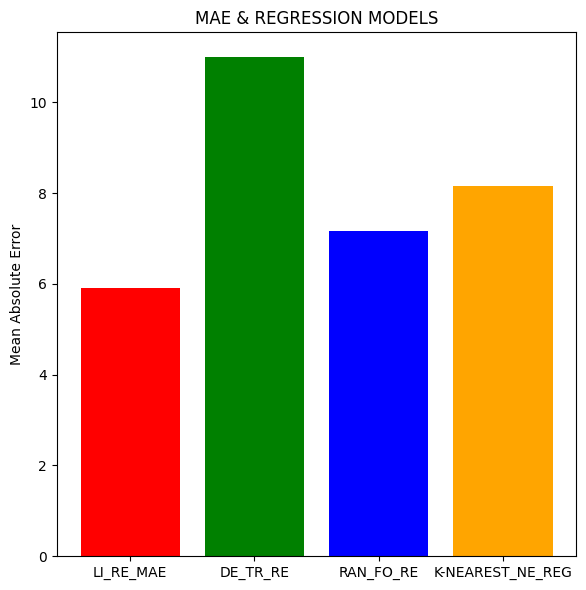

In [72]:
mae_scores={
    "LI_RE_MAE":mean_absolute_error(y_test,y_pre),
    "DE_TR_RE":mean_absolute_error(y_test,y_pre_dtr),
    "RAN_FO_RE":mean_absolute_error(y_test,y_pre_rfr),
    "K-NEAREST_NE_REG":mean_absolute_error(y_test,y_pre_knn)
}

#Plotting

plt.figure(figsize=(6,6))
plt.bar(mae_scores.keys(),mae_scores.values(),color=["red","green","blue","orange"])
plt.ylabel("Mean Absolute Error")
plt.title("MAE & REGRESSION MODELS")
plt.tight_layout()
plt.show()

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

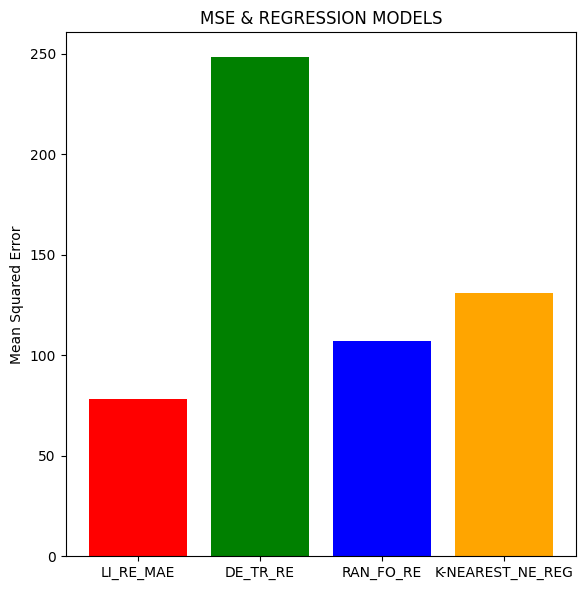

In [75]:
mse_scores={
    "LI_RE_MAE":mean_squared_error(y_test,y_pre),
    "DE_TR_RE":mean_squared_error(y_test,y_pre_dtr),
    "RAN_FO_RE":mean_squared_error(y_test,y_pre_rfr),
    "K-NEAREST_NE_REG":mean_squared_error(y_test,y_pre_knn)
}

#Plotting

plt.figure(figsize=(6,6))
plt.bar(mse_scores.keys(),mse_scores.values(),color=["red","green","blue","orange"])
plt.ylabel("Mean Squared Error")
plt.title("MSE & REGRESSION MODELS")
plt.tight_layout()
plt.show()